# Types of Adstock Transformations

- **[Geo-Adstock Decay](#1)**
- **[Decay Effect](#2)**
- **[Adstock Carryover Impact](#3)**
- **[Diminishing Return](#4)**
    - **[C-Curve](#4.1)**
    - **[S-Curve](#4.2)**
- **[Lag Delay Effect](#5)**
- **[APL](#6)**  
- **[Log Decay Model](#7)**
- **[Negative Exponential Decay Model](#8)**
- **[Half Life Estimation](#9)**

<a id="1"></a>
## 1. Geo-Adstock Decay

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\sanand\OneDrive - TRINITY PARTNERS LLC\Documents\Promo.csv')

In [3]:
df1 = df.copy()

In [4]:
df1

,promo
0,100
1,120
2,200
3,300
4,101
5,50
6,200
7,134
8,137
9,103


In [5]:
def weighted_sum(df, col1, rate):
    temp = 0
    a = []
    for i in df.index:
        if i == 0:
            z = round(df.loc[i, col1] * rate,1)
        else:
            z = round(df.loc[i, col1] + rate * temp,1)
        temp = z
        a.append(z)
    df['Promo_Weighted_Sum'] = a
    return df

In [6]:
weighted_sum(df1,'promo',0.8)

,promo,Promo_Weighted_Sum
0,100,80.0
1,120,184.0
2,200,347.2
3,300,577.8
4,101,563.2
5,50,500.6
6,200,600.5
7,134,614.4
8,137,628.5
9,103,605.8


In [7]:
def weights(df,rate):
    temp=1
    b=[]
    for i in range(len(df1)):
        if i==0:
            x=temp
        else:
            x=round(1+temp*rate,2)
        temp=x
        b.append(x)
    df['Weights'] = b
    return df

In [8]:
weights(df1,0.8)

,promo,Promo_Weighted_Sum,Weights
0,100,80.0,1.00
1,120,184.0,1.80
2,200,347.2,2.44
3,300,577.8,2.95
4,101,563.2,3.36
5,50,500.6,3.69
6,200,600.5,3.95
7,134,614.4,4.16
8,137,628.5,4.33
9,103,605.8,4.46


In [9]:
df1['Promo_Weighted_Avg'] = round(df1['Promo_Weighted_Sum']/df1['Weights'],1)

In [10]:
df1

,promo,Promo_Weighted_Sum,Weights,Promo_Weighted_Avg
0,100,80.0,1.00,80.0
1,120,184.0,1.80,102.2
2,200,347.2,2.44,142.3
3,300,577.8,2.95,195.9
4,101,563.2,3.36,167.6
5,50,500.6,3.69,135.7
6,200,600.5,3.95,152.0
7,134,614.4,4.16,147.7
8,137,628.5,4.33,145.2
9,103,605.8,4.46,135.8


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


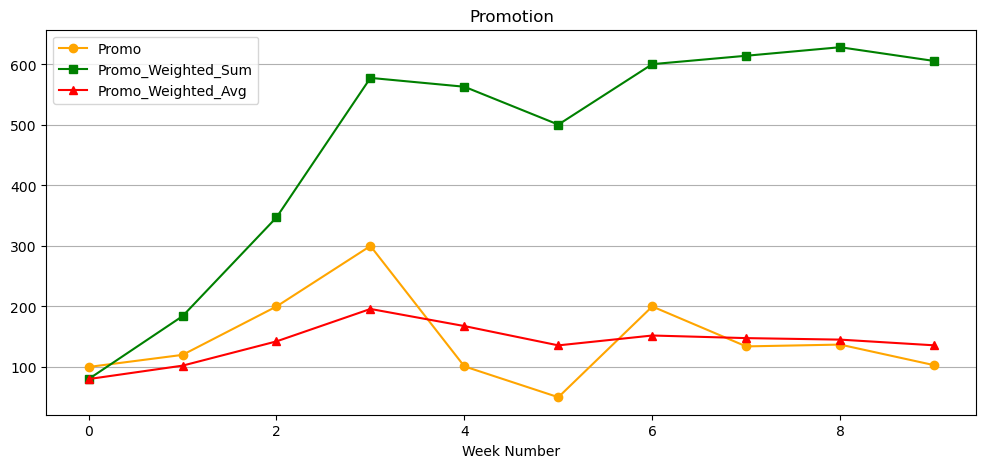

In [11]:
plt.rcParams['figure.figsize']=[12, 5]
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df1['promo'].plot(label='Promo', color='orange', marker='o')
df1['Promo_Weighted_Sum'].plot(label='Promo_Weighted_Sum', color='green',marker='s')
df1['Promo_Weighted_Avg'].plot(label='Promo_Weighted_Avg', color='red',marker='^')
  
# adding title to the plot
plt.title('Promotion')
  
# adding Label to the x-axis
plt.xlabel('Week Number')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

<a id="2"></a>
## 2. Decay Effect

In [12]:
df2 = df.copy()

In [13]:
df2.head()

,promo
0,100
1,120
2,200
3,300
4,101


In [14]:
df2['Lag_2W'] = 0.5*df2['promo'].shift(2)

In [15]:
df2.fillna(0,inplace=True)

In [16]:
df2['Effective Impact'] = df2['promo'] + df2['Lag_2W']

In [17]:
df2

,promo,Lag_2W,Effective Impact
0,100,0.0,100.0
1,120,0.0,120.0
2,200,50.0,250.0
3,300,60.0,360.0
4,101,100.0,201.0
5,50,150.0,200.0
6,200,50.5,250.5
7,134,25.0,159.0
8,137,100.0,237.0
9,103,67.0,170.0


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app


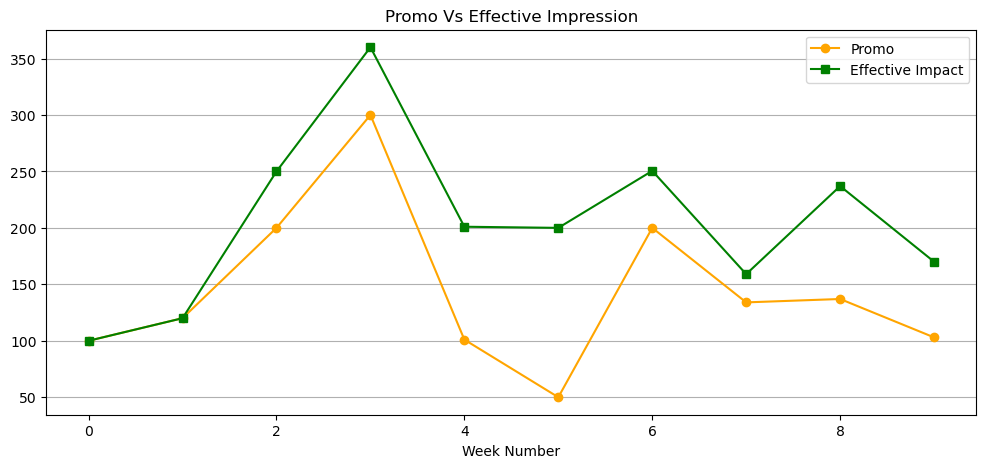

In [18]:
plt.rcParams['figure.figsize']=[12, 5]
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df2['promo'].plot(label='Promo', color='orange', marker='o')
df2['Effective Impact'].plot(label='Effective Impact', color='green',marker='s')
  
# adding title to the plot
plt.title('Promo Vs Effective Impression')
  
# adding Label to the x-axis
plt.xlabel('Week Number')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

<a id="3"></a>
## 3. Adstock CarryOver Impact

In [19]:
df3 = pd.DataFrame({'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                   'Series':[1,1,1,1,1,1,1,1,1,1,1,1]})

In [20]:
df3

,Month,Series
0,Jan,1
1,Feb,1
2,Mar,1
3,Apr,1
4,May,1
5,Jun,1
6,Jul,1
7,Aug,1
8,Sep,1
9,Oct,1


In [21]:
decay_rates = [0.1, 0.3, 0.5, 0.7]

# calculate the Adstock transformation for each decay rate
for decay in decay_rates:
    adstock_col = f"AD_{decay}"
    df3[adstock_col] = df3['Series']
    for i in range(1, len(df3)):
        df3.loc[i, adstock_col] = df3.loc[i, 'Series'] + decay * df3.loc[i - 1, adstock_col]

# print the DataFrame
display(df3)

,Month,Series,AD_0.1,AD_0.3,AD_0.5,AD_0.7
0,Jan,1,1.000000,1.000000,1.000000,1.000000
1,Feb,1,1.100000,1.300000,1.500000,1.700000
2,Mar,1,1.110000,1.390000,1.750000,2.190000
3,Apr,1,1.111000,1.417000,1.875000,2.533000
4,May,1,1.111100,1.425100,1.937500,2.773100
5,Jun,1,1.111110,1.427530,1.968750,2.941170
6,Jul,1,1.111111,1.428259,1.984375,3.058819
7,Aug,1,1.111111,1.428478,1.992188,3.141173
8,Sep,1,1.111111,1.428543,1.996094,3.198821
9,Oct,1,1.111111,1.428563,1.998047,3.239175


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


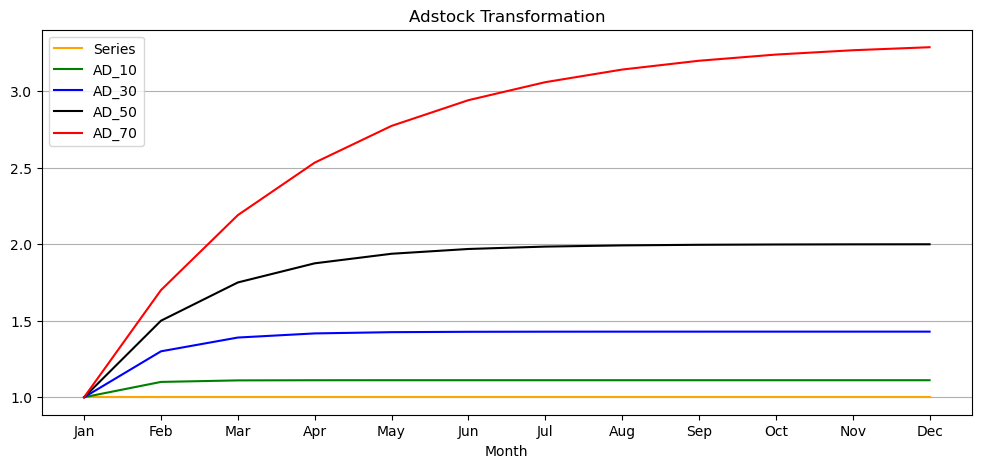

In [22]:
plt.rcParams['figure.figsize']=[12, 5]
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
plt.plot(df3['Month'], df3['Series'], color='orange',label='Series')
plt.plot(df3['Month'], df3['AD_0.1'], color='green',label='AD_10')
plt.plot(df3['Month'], df3['AD_0.3'], color='blue',label='AD_30')
plt.plot(df3['Month'], df3['AD_0.5'], color='black',label='AD_50')
plt.plot(df3['Month'], df3['AD_0.7'], color='red',label='AD_70')
  
# adding title to the plot
plt.title('Adstock Transformation')
  
# adding Label to the x-axis
plt.xlabel('Month')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

In [23]:
df31 = pd.DataFrame({'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                   'Series':[1,0,0,0,0,0,0,0,0,0,0,0]})

In [24]:
df31

,Month,Series
0,Jan,1
1,Feb,0
2,Mar,0
3,Apr,0
4,May,0
5,Jun,0
6,Jul,0
7,Aug,0
8,Sep,0
9,Oct,0


In [25]:
decay_rates = [0.1, 0.3, 0.5, 0.7]

# calculate the Adstock transformation for each decay rate
for decay in decay_rates:
    adstock_col = f"AD_{decay}"
    df31[adstock_col] = df31['Series']
    for i in range(1, len(df31)):
        df31.loc[i, adstock_col] = df31.loc[i, 'Series'] + decay * df31.loc[i - 1, adstock_col]

# print the DataFrame
display(df31)

,Month,Series,AD_0.1,AD_0.3,AD_0.5,AD_0.7
0,Jan,1,1.000000e+00,1.000000,1.000000,1.000000
1,Feb,0,1.000000e-01,0.300000,0.500000,0.700000
2,Mar,0,1.000000e-02,0.090000,0.250000,0.490000
3,Apr,0,1.000000e-03,0.027000,0.125000,0.343000
4,May,0,1.000000e-04,0.008100,0.062500,0.240100
5,Jun,0,1.000000e-05,0.002430,0.031250,0.168070
6,Jul,0,1.000000e-06,0.000729,0.015625,0.117649
7,Aug,0,1.000000e-07,0.000219,0.007812,0.082354
8,Sep,0,1.000000e-08,0.000066,0.003906,0.057648
9,Oct,0,1.000000e-09,0.000020,0.001953,0.040354


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


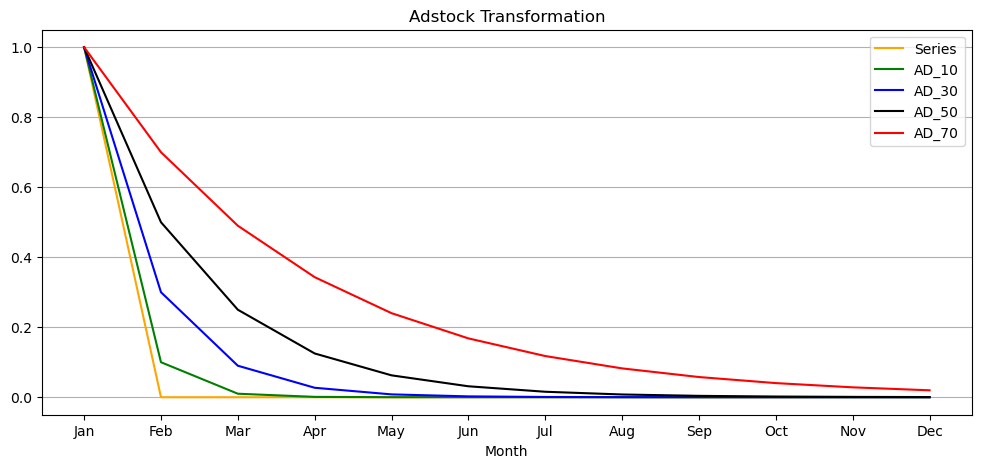

In [26]:
plt.rcParams['figure.figsize']=[12, 5]
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
plt.plot(df31['Month'], df31['Series'], color='orange',label='Series')
plt.plot(df31['Month'], df31['AD_0.1'], color='green',label='AD_10')
plt.plot(df31['Month'], df31['AD_0.3'], color='blue',label='AD_30')
plt.plot(df31['Month'], df31['AD_0.5'], color='black',label='AD_50')
plt.plot(df31['Month'], df31['AD_0.7'], color='red',label='AD_70')
# adding title to the plot
plt.title('Adstock Transformation')
  
# adding Label to the x-axis
plt.xlabel('Month')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

<a id="4"></a>
## 4. Diminishing Return

<a id="4.1"></a>
### 4.1. C-Curve

In [27]:
df4 = pd.DataFrame({'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                   'Series':[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000]})

In [28]:
df4

,Month,Series
0,Jan,1000
1,Feb,2000
2,Mar,3000
3,Apr,4000
4,May,5000
5,Jun,6000
6,Jul,7000
7,Aug,8000
8,Sep,9000
9,Oct,10000


In [29]:
power = [0.1, 0.3]

# calculate the Power transformation for series
for p in power:
    power_col = f"AD_{p}"
    df4[power_col] = df4['Series']
    for i in range(0, len(df4)):
        df4.loc[i, power_col] = df4.loc[i, 'Series']**p

# print the DataFrame
display(df4)

,Month,Series,AD_0.1,AD_0.3
0,Jan,1000,1.995262,7.943282
1,Feb,2000,2.138469,9.779328
2,Mar,3000,2.226959,11.044254
3,Apr,4000,2.291955,12.039765
4,May,5000,2.343673,12.873333
5,Jun,6000,2.386795,13.597071
6,Jul,7000,2.423873,14.240637
7,Aug,8000,2.456456,14.822689
8,Sep,9000,2.485560,15.355811
9,Oct,10000,2.511886,15.848932


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


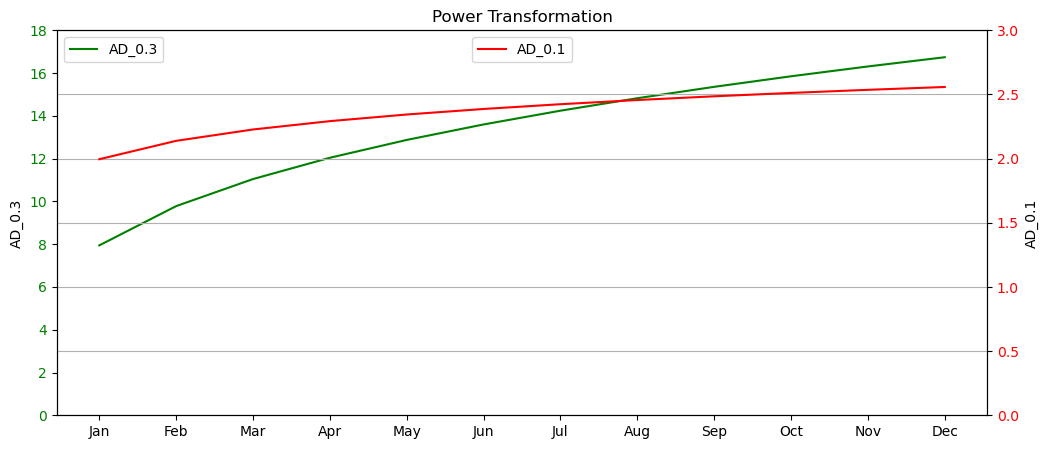

In [30]:
# create the plot
fig, ax1 = plt.subplots()

# plot the 'Series' column on the first y-axis
ax1.plot(df4['Month'], df4['AD_0.3'], color='green', label='AD_0.3')
ax1.set_ylabel('AD_0.3')
ax1.tick_params(axis='y', labelcolor='green')

# set the maximum value for the left y-axis to 18
ax1.set_ylim([0, 18])

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the 'AD_0.1' and 'AD_0.3' columns on the second y-axis
ax2.plot(df4['Month'], df4['AD_0.1'], color='red', label='AD_0.1')
ax2.set_ylabel('AD_0.1')
ax2.tick_params(axis='y', labelcolor='red')

# set the maximum value for the right y-axis to 3
ax2.set_ylim([0, 3])

# set the title and legends
plt.title('Power Transformation')
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add gridlines to the plot
plt.grid(b=True, axis='y')

# show the plot
plt.show()

In [31]:
# calculate the slope and add it as a new column
df4['Slope_PW_10'] = df4['AD_0.1'].diff()*100/df4['Series'].diff()
df4['Slope_PW_30'] = df4['AD_0.3'].diff()*100/df4['Series'].diff()

In [32]:
df4

,Month,Series,AD_0.1,AD_0.3,Slope_PW_10,Slope_PW_30
0,Jan,1000,1.995262,7.943282,NaN,NaN
1,Feb,2000,2.138469,9.779328,0.014321,0.183605
2,Mar,3000,2.226959,11.044254,0.008849,0.126493
3,Apr,4000,2.291955,12.039765,0.006500,0.099551
4,May,5000,2.343673,12.873333,0.005172,0.083357
5,Jun,6000,2.386795,13.597071,0.004312,0.072374
6,Jul,7000,2.423873,14.240637,0.003708,0.064357
7,Aug,8000,2.456456,14.822689,0.003258,0.058205
8,Sep,9000,2.485560,15.355811,0.002910,0.053312
9,Oct,10000,2.511886,15.848932,0.002633,0.049312


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


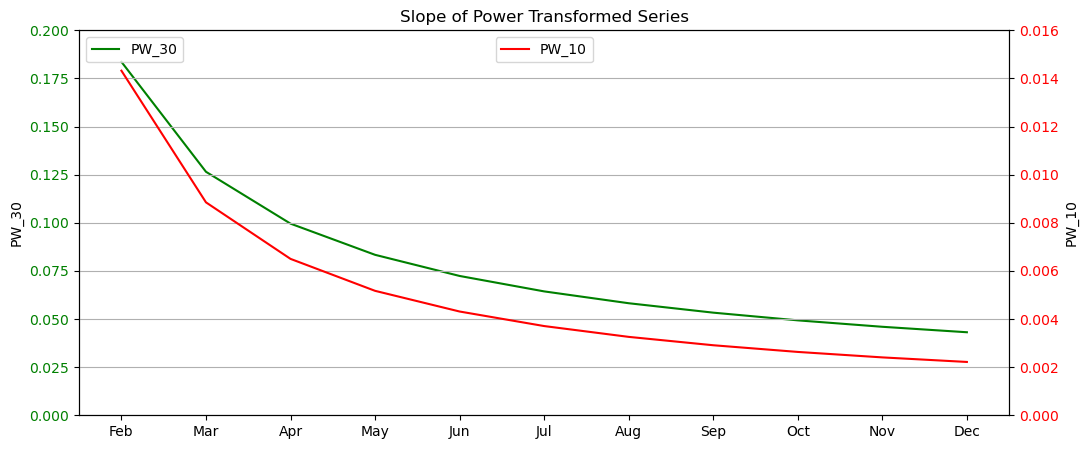

In [33]:
# create the plot
fig, ax1 = plt.subplots()

# plot the 'Series' column on the first y-axis
ax1.plot(df4['Month'], df4['Slope_PW_30'], color='green', label='PW_30')
ax1.set_ylabel('PW_30')
ax1.tick_params(axis='y', labelcolor='green')

# set the maximum value for the left y-axis to 0.2
ax1.set_ylim([0, 0.2])

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the 'AD_0.1' and 'AD_0.3' columns on the second y-axis
ax2.plot(df4['Month'], df4['Slope_PW_10'], color='red', label='PW_10')
ax2.set_ylabel('PW_10')
ax2.tick_params(axis='y', labelcolor='red')

# set the maximum value for the right y-axis to 0.016
ax2.set_ylim([0, 0.016])

# set the title and legends
plt.title('Slope of Power Transformed Series')
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add gridlines to the plot
plt.grid(b=True, axis='y')

# show the plot
plt.show()

<a id="4.2"></a>
### 4.2. S-Curve

In [34]:
df42 = pd.DataFrame({'S.No.':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'Series':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]})

In [35]:
alpha = 4
gamma = 0.4

df42['S-Curve Transform'] = round(df42['Series'] ** alpha / (df42['Series'] ** alpha + df42['Series'] ** gamma),3)

In [36]:
df42

,S.No.,Series,S-Curve Transform
0,1,0.1,0.000
1,2,0.2,0.003
2,3,0.3,0.013
3,4,0.4,0.036
4,5,0.5,0.076
5,6,0.6,0.137
6,7,0.7,0.217
7,8,0.8,0.309
8,9,0.9,0.406
9,10,1.0,0.500


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


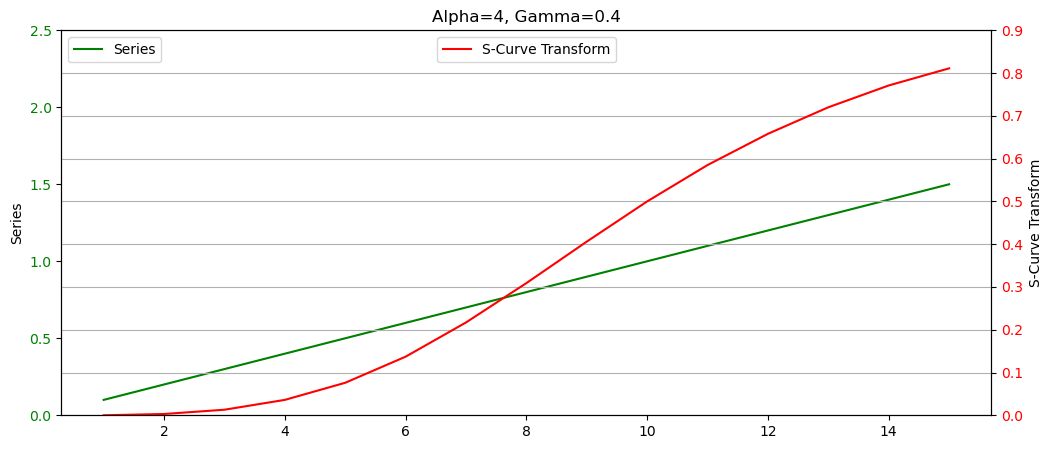

In [37]:
# create the plot
fig, ax1 = plt.subplots()

# plot the 'Series' column on the first y-axis
ax1.plot(df42['S.No.'], df42['Series'], color='green', label='Series')
ax1.set_ylabel('Series')
ax1.tick_params(axis='y', labelcolor='green')

# set the maximum value for the left y-axis to 2.5
ax1.set_ylim([0, 2.5])

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the 'AD_0.1' and 'AD_0.3' columns on the second y-axis
ax2.plot(df42['S.No.'], df42['S-Curve Transform'], color='red', label='S-Curve Transform')
ax2.set_ylabel('S-Curve Transform')
ax2.tick_params(axis='y', labelcolor='red')

# set the maximum value for the right y-axis to 0.900
ax2.set_ylim([0, 0.900])

# set the title and legends
plt.title('Alpha=4, Gamma=0.4')
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add gridlines to the plot
plt.grid(b=True, axis='y')

# show the plot
plt.show()

In [38]:
alpha = 3
gamma = 0.4

df42['S-Curve T_3_0.4'] = round(df42['Series'] ** alpha / (df42['Series'] ** alpha + df42['Series'] ** gamma),3)

C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


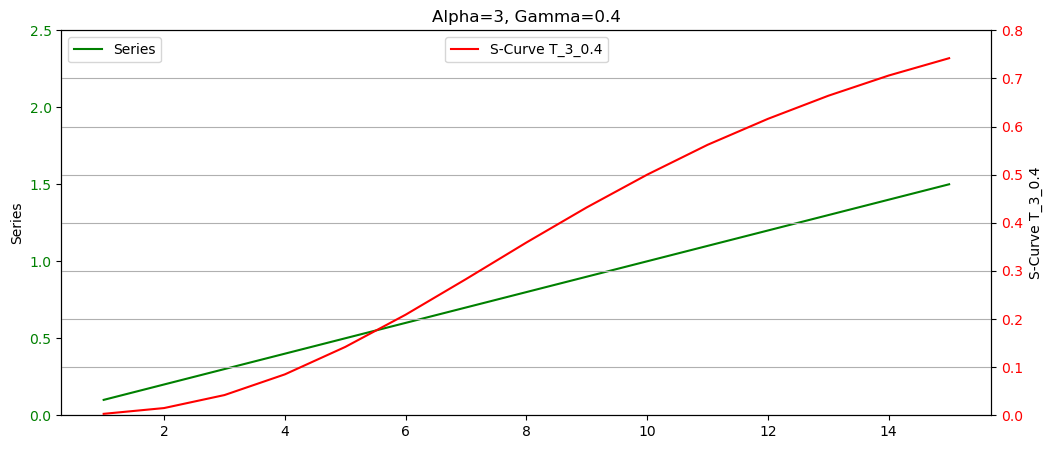

In [39]:
# create the plot
fig, ax1 = plt.subplots()

# plot the 'Series' column on the first y-axis
ax1.plot(df42['S.No.'], df42['Series'], color='green', label='Series')
ax1.set_ylabel('Series')
ax1.tick_params(axis='y', labelcolor='green')

# set the maximum value for the left y-axis to 2.5
ax1.set_ylim([0, 2.5])

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the 'AD_0.1' and 'AD_0.3' columns on the second y-axis
ax2.plot(df42['S.No.'], df42['S-Curve T_3_0.4'], color='red', label='S-Curve T_3_0.4')
ax2.set_ylabel('S-Curve T_3_0.4')
ax2.tick_params(axis='y', labelcolor='red')

# set the maximum value for the right y-axis to 0.800
ax2.set_ylim([0, 0.800])

# set the title and legends
plt.title('Alpha=3, Gamma=0.4')
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add gridlines to the plot
plt.grid(b=True, axis='y')

# show the plot
plt.show()

In [40]:
alpha = 1
gamma = 0.4

df42['S-Curve T_1_0.4'] = round(df42['Series'] ** alpha / (df42['Series'] ** alpha + df42['Series'] ** gamma),3)

C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


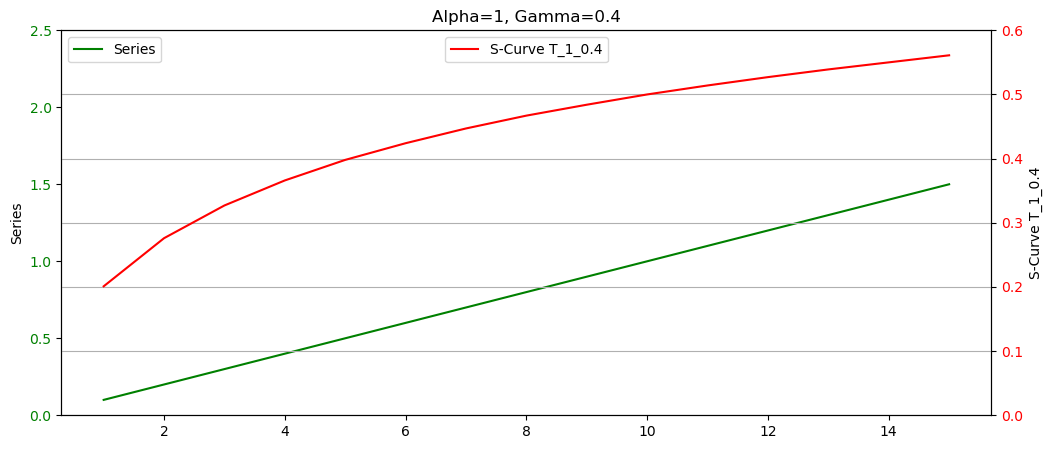

In [41]:
# create the plot
fig, ax1 = plt.subplots()

# plot the 'Series' column on the first y-axis
ax1.plot(df42['S.No.'], df42['Series'], color='green', label='Series')
ax1.set_ylabel('Series')
ax1.tick_params(axis='y', labelcolor='green')

# set the maximum value for the left y-axis to 2.5
ax1.set_ylim([0, 2.5])

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the 'AD_0.1' and 'AD_0.3' columns on the second y-axis
ax2.plot(df42['S.No.'], df42['S-Curve T_1_0.4'], color='red', label='S-Curve T_1_0.4')
ax2.set_ylabel('S-Curve T_1_0.4')
ax2.tick_params(axis='y', labelcolor='red')

# set the maximum value for the right y-axis to 0.600
ax2.set_ylim([0, 0.600])

# set the title and legends
plt.title('Alpha=1, Gamma=0.4')
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add gridlines to the plot
plt.grid(b=True, axis='y')

# show the plot
plt.show()

In [42]:
alpha = 4
gamma = 0.1

df42['S-Curve T_4_0.1'] = round(df42['Series'] ** alpha / (df42['Series'] ** alpha + df42['Series'] ** gamma),3)

C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


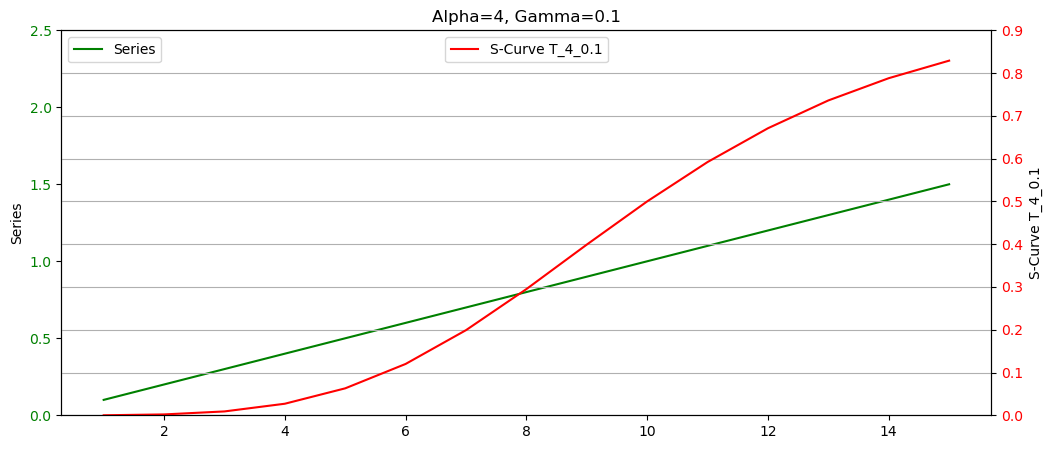

In [43]:
# create the plot
fig, ax1 = plt.subplots()

# plot the 'Series' column on the first y-axis
ax1.plot(df42['S.No.'], df42['Series'], color='green', label='Series')
ax1.set_ylabel('Series')
ax1.tick_params(axis='y', labelcolor='green')

# set the maximum value for the left y-axis to 2.5
ax1.set_ylim([0, 2.5])

# create a second y-axis on the right side
ax2 = ax1.twinx()

# plot the 'AD_0.1' and 'AD_0.3' columns on the second y-axis
ax2.plot(df42['S.No.'], df42['S-Curve T_4_0.1'], color='red', label='S-Curve T_4_0.1')
ax2.set_ylabel('S-Curve T_4_0.1')
ax2.tick_params(axis='y', labelcolor='red')

# set the maximum value for the right y-axis to 0.600
ax2.set_ylim([0, 0.900])

# set the title and legends
plt.title('Alpha=4, Gamma=0.1')
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Add gridlines to the plot
plt.grid(b=True, axis='y')

# show the plot
plt.show()

<a id="5"></a>
## 5. Lag Delay Effect

In [44]:
df5 = pd.DataFrame({'S.No.':[1,2,3,4,5,6,7,8,9,10,11,12,13],
    'Series':[18,43,37,32,47,10,25,28,15,28,30,31,29]})

In [45]:
df5['Series_Lag1'] = df5['Series'].shift(1)
df5['Series_Lag2'] = df5['Series'].shift(2)

In [46]:
df5

,S.No.,Series,Series_Lag1,Series_Lag2
0,1,18,NaN,NaN
1,2,43,18.0,NaN
2,3,37,43.0,18.0
3,4,32,37.0,43.0
4,5,47,32.0,37.0
5,6,10,47.0,32.0
6,7,25,10.0,47.0
7,8,28,25.0,10.0
8,9,15,28.0,25.0
9,10,28,15.0,28.0


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


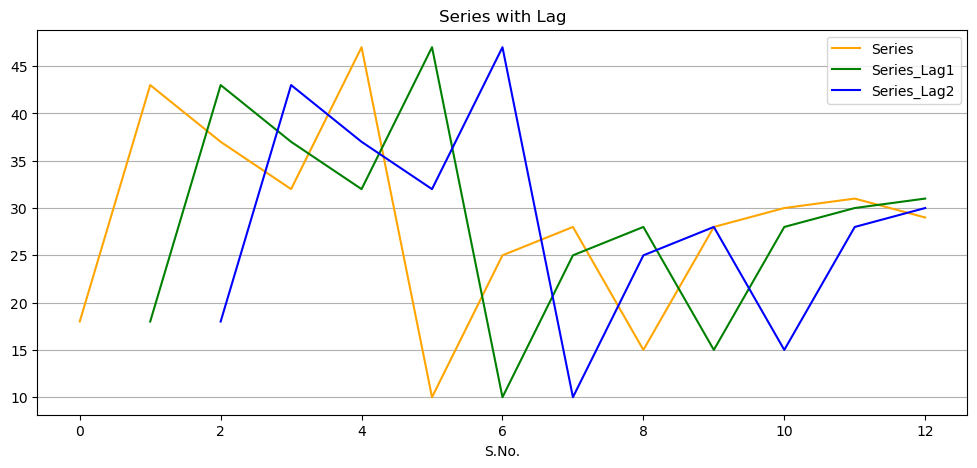

In [47]:
plt.rcParams['figure.figsize']=[12, 5]
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df5['Series'].plot(label='Series', color='orange')
df5['Series_Lag1'].plot(label='Series_Lag1', color='green')
df5['Series_Lag2'].plot(label='Series_Lag2', color='blue')
  
# adding title to the plot
plt.title('Series with Lag')
  
# adding Label to the x-axis
plt.xlabel('S.No.')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

<a id="6"></a>
## 6. APL

In [48]:
df6 = pd.DataFrame({'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                   'Series':[1,10,100,300,700,1100,1500,2100,2700,3500,4500,6300]})

In [49]:
decay_rate = [ 0.7]

# calculate the Adstock transformation for each decay rate
for decay in decay_rate:
    adstock_col = f"AD_{decay}"
    df6[adstock_col] = df6['Series']
    for i in range(1, len(df6)):
        df6.loc[i, adstock_col] = df6.loc[i, 'Series'] + decay * df6.loc[i - 1, adstock_col]

In [50]:
power = 0.9
# # calculate the Power transformation for series
# for p in power:
#     power_col = f"PW_{p}"
#     df6[power_col] = df6['Series']
#     for i in range(0, len(df6)):
#         df6.loc[i, power_col] = df6.loc[i, 'Series']**p
df6['PW_0.9'] = df6['AD_0.7']**power

In [51]:
df6['Lag_1M'] = df6['PW_0.9'].shift(1)
df6.fillna(0,inplace=True)

In [52]:
df6['Eff_Series'] = df6['Series']+df6['Lag_1M']

In [53]:
df6

,Month,Series,AD_0.7,PW_0.9,Lag_1M,Eff_Series
0,Jan,1,1.000000,1.000000,0.000000,1.000000
1,Feb,10,10.700000,8.442001,1.000000,11.000000
2,Mar,100,107.490000,67.333510,8.442001,108.442001
3,Apr,300,375.243000,207.434667,67.333510,367.333510
4,May,700,962.670100,484.317024,207.434667,907.434667
5,Jun,1100,1773.869070,839.516826,484.317024,1584.317024
6,Jul,1500,2741.708349,1242.278958,839.516826,2339.516826
7,Aug,2100,4019.195844,1752.771293,1242.278958,3342.278958
8,Sep,2700,5513.437091,2329.593690,1752.771293,4452.771293
9,Oct,3500,7359.405964,3021.053973,2329.593690,5829.593690


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]


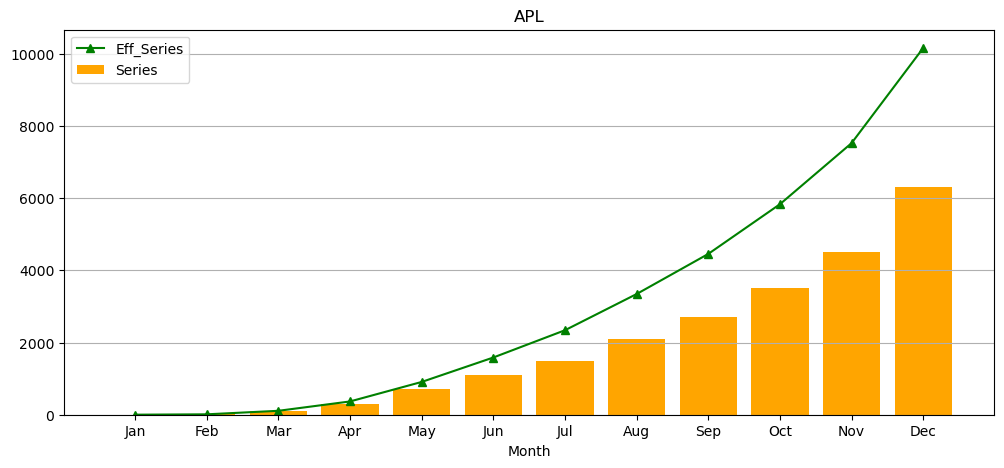

In [54]:
plt.rcParams['figure.figsize']=[12, 5]
  
plt.bar(df6['Month'], df6['Series'], color='orange',label='Series')
plt.plot(df6['Month'], df6['Eff_Series'], color='green',marker='^',label='Eff_Series')

# adding title to the plot
plt.title('APL')
  
# adding Label to the x-axis
plt.xlabel('Month')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

<a id="7"></a>
## 7. Log Decay Model

In [55]:
df7 = pd.DataFrame({'Week':[1,2,3,4,5,6,7,8,9,10,11,12],
    'Impressions':[5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000]})

In [56]:
df7['Log(Imp)'] = np.log(df7['Impressions'])

In [57]:
df7['At-1'] = 0.5*df7['Impressions'].shift(1)

In [58]:
df7.fillna(0,inplace=True)

In [59]:
df7['Eff_Imp'] = df7['Log(Imp)']+df7['At-1']

In [60]:
df7

,Week,Impressions,Log(Imp),At-1,Eff_Imp
0,1,5000,8.517193,0.0,8.517193
1,2,6000,8.699515,2500.0,2508.699515
2,3,7000,8.853665,3000.0,3008.853665
3,4,8000,8.987197,3500.0,3508.987197
4,5,9000,9.104980,4000.0,4009.104980
5,6,10000,9.210340,4500.0,4509.210340
6,7,11000,9.305651,5000.0,5009.305651
7,8,12000,9.392662,5500.0,5509.392662
8,9,13000,9.472705,6000.0,6009.472705
9,10,14000,9.546813,6500.0,6509.546813


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]


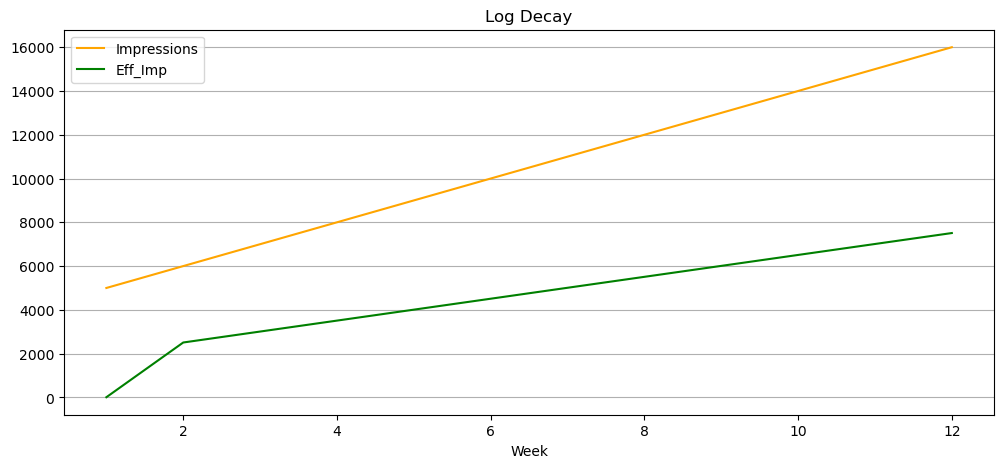

In [61]:
plt.rcParams['figure.figsize']=[12, 5]
  
plt.plot(df7['Week'], df7['Impressions'], color='orange',label='Impressions')
plt.plot(df7['Week'], df7['Eff_Imp'], color='green',label='Eff_Imp')

# adding title to the plot
plt.title('Log Decay')
  
# adding Label to the x-axis
plt.xlabel('Week')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

<a id="8"></a>
## 8. Negative Exponential Decay Model

In [62]:
df8 = pd.DataFrame({'Week':[1,2,3,4,5,6,7,8,9,10,11,12],
    'Impressions':[5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000]})

In [63]:
learning_rate = 0.5
exp = 2.718
df8['exp'] = exp**(-learning_rate*df8['Impressions'])

In [64]:
lag_wt = 0.8
df8['At-1'] = lag_wt*df8['Impressions'].shift(1)

In [65]:
df8.fillna(0,inplace=True)

In [66]:
df8['Eff_Imp'] = 1-df8['exp']+df8['At-1']

In [67]:
df8

,Week,Impressions,exp,At-1,Eff_Imp
0,1,5000,0.0,0.0,1.0
1,2,6000,0.0,4000.0,4001.0
2,3,7000,0.0,4800.0,4801.0
3,4,8000,0.0,5600.0,5601.0
4,5,9000,0.0,6400.0,6401.0
5,6,10000,0.0,7200.0,7201.0
6,7,11000,0.0,8000.0,8001.0
7,8,12000,0.0,8800.0,8801.0
8,9,13000,0.0,9600.0,9601.0
9,10,14000,0.0,10400.0,10401.0


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]


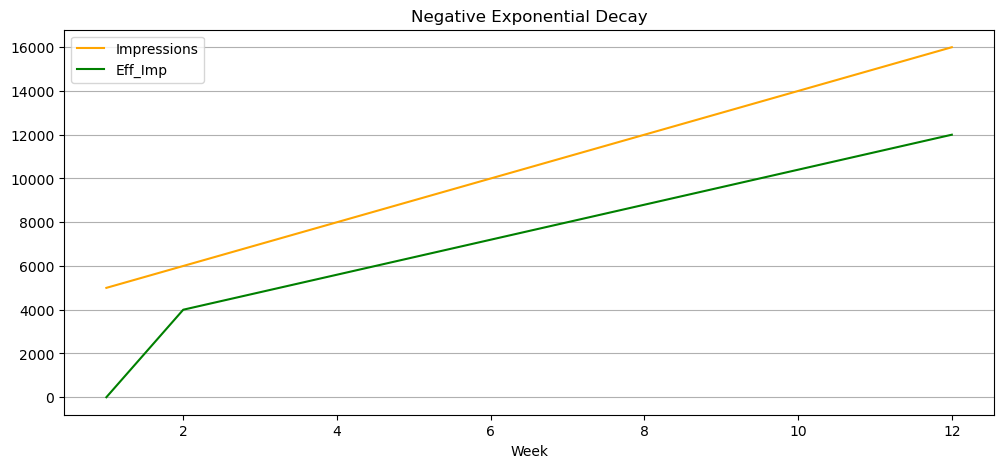

In [68]:
plt.rcParams['figure.figsize']=[12, 5]
  
plt.plot(df8['Week'], df8['Impressions'], color='orange',label='Impressions')
plt.plot(df8['Week'], df8['Eff_Imp'], color='green',label='Eff_Imp')

# adding title to the plot
plt.title('Negative Exponential Decay')
  
# adding Label to the x-axis
plt.xlabel('Week')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

<a id="9"></a>
## 9. Half Life Estimation

In [69]:
df9 = pd.DataFrame({'Week':[1,2,3,4,5,6,7,8,9,10,11,12],
    'Impressions':[5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000]})

In [70]:
half_life = 3
df9['Half t/h'] = 0.5**((df9['Week']-1)/half_life)

In [71]:
df9['Final_Imp'] = df9['Impressions']*df9['Half t/h']

In [72]:
df9['Final_Imp'] = df9['Final_Imp'].shift(1)
df9.fillna(0,inplace=True)

In [73]:
df9['Eff_Imp'] = df9['Impressions']+df9['Final_Imp']

In [74]:
df9

,Week,Impressions,Half t/h,Final_Imp,Eff_Imp
0,1,5000,1.000000,0.000000,5000.000000
1,2,6000,0.793701,5000.000000,11000.000000
2,3,7000,0.629961,4762.203156,11762.203156
3,4,8000,0.500000,4409.723675,12409.723675
4,5,9000,0.396850,4000.000000,13000.000000
5,6,10000,0.314980,3571.652367,13571.652367
6,7,11000,0.250000,3149.802625,14149.802625
7,8,12000,0.198425,2750.000000,14750.000000
8,9,13000,0.157490,2381.101578,15381.101578
9,10,14000,0.125000,2047.371706,16047.371706


C:\Users\sanand\Anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]


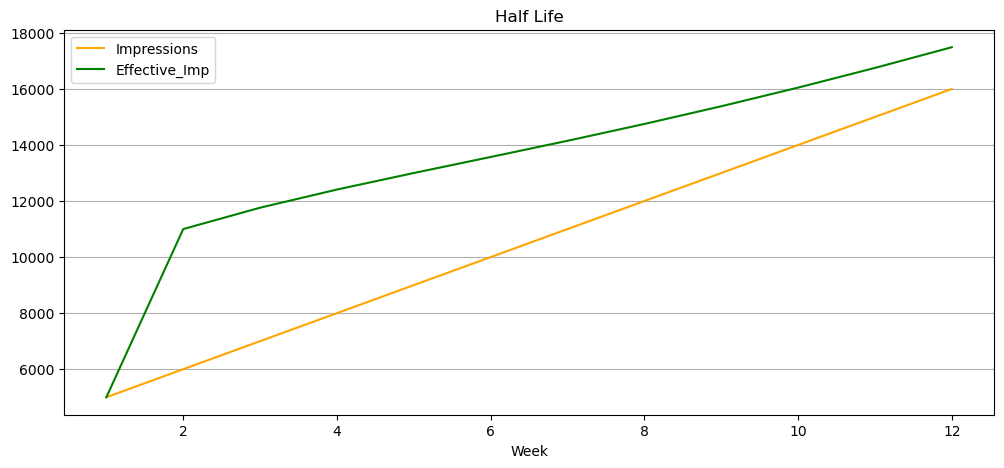

In [75]:
plt.rcParams['figure.figsize']=[12, 5]
  
plt.plot(df9['Week'], df9['Impressions'], color='orange',label='Impressions')
plt.plot(df9['Week'], df9['Eff_Imp'], color='green',label='Effective_Imp')

# adding title to the plot
plt.title('Half Life')
  
# adding Label to the x-axis
plt.xlabel('Week')

# Add gridlines to the plot
plt.grid(b=True, axis='y')
  
# adding legend to the curve
plt.legend()

## END